# Interpreting Nonlinear Models: Avoiding Common Mistakes

This notebook demonstrates how to correctly interpret **nonlinear model** recommendations and avoid common misinterpretation mistakes.

Understanding interpretation is critical because:
- **Nonlinear models are harder to interpret** than linear models
- **Common mistakes** lead to poor decisions and model rejection
- **Context matters** - where you are on the curve affects interpretation
- **Safe interpretation strategies** help you use nonlinear models effectively


## Key Concepts

**Why Nonlinear Models Are Harder to Interpret**:
- The relationship depends on where you are on the curve
- You cannot use simple rules like "double input = double output"
- The same input change produces different output changes at different points
- Context matters more than with linear models

**Common Interpretation Mistakes**:
- Assuming linearity when relationships are nonlinear
- Over-extrapolating beyond the data
- Missing inflection points where relationships change
- Ignoring context (where you are on the curve)

**Safe Interpretation Strategies**:
- Understand where you are on the curve
- Consider how relationships might change
- Test with small changes first
- Use sensitivity analysis


## Scenario: Marketing Budget Recommendation

You receive a recommendation from a nonlinear marketing optimization model:
- Current spend: $3,000/month
- Model recommends: $5,000/month
- Expected increase: 150 additional customers

**Question**: Is this recommendation correct? How should you interpret it?

**Challenge**: The relationship is nonlinear, so you cannot simply assume that the same change would work the same way at different spending levels.


## Step 1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Step 2: Model the Nonlinear Relationship

Let's create a marketing model with diminishing returns:


In [2]:
# Nonlinear marketing model with diminishing returns
def marketing_customers(marketing_spend):
    """Marketing spend produces customers with diminishing returns"""
    return 200 * np.sqrt(marketing_spend / 1000)

# Current situation
current_spend = 3000
current_customers = marketing_customers(current_spend)

# Model recommendation
recommended_spend = 5000
recommended_customers = marketing_customers(recommended_spend)
expected_increase = recommended_customers - current_customers

print("MODEL RECOMMENDATION")
print("=" * 70)
print(f"Current spend: ${current_spend:,}/month")
print(f"Current customers: {current_customers:.0f}")
print(f"\nRecommended spend: ${recommended_spend:,}/month")
print(f"Expected customers: {recommended_customers:.0f}")
print(f"Expected increase: {expected_increase:.0f} customers")
print(f"Spend increase: ${recommended_spend - current_spend:,} ({(recommended_spend/current_spend - 1)*100:.1f}% increase)")


MODEL RECOMMENDATION
Current spend: $3,000/month
Current customers: 346

Recommended spend: $5,000/month
Expected customers: 447
Expected increase: 101 customers
Spend increase: $2,000 (66.7% increase)


## Step 3: Mistake 1 - Assuming Linearity

A common mistake is to assume the relationship is linear and extrapolate incorrectly:


In [3]:
# MISTAKE: Assuming linearity
# If $3,000 → 346 customers, and we increase by $2,000 to $5,000
# Linear thinking: "If $2,000 increase gives us 150 customers, 
#                    then another $2,000 should give us another 150 customers"

# Linear assumption calculation
linear_rate = expected_increase / (recommended_spend - current_spend)  # customers per dollar
linear_prediction = current_customers + (linear_rate * (recommended_spend - current_spend))

# What actually happens (nonlinear reality)
actual_at_5000 = marketing_customers(5000)
actual_increase = actual_at_5000 - current_customers

# If we extrapolate linearly to $7,000
extrapolated_spend = 7000
linear_extrapolation = current_customers + (linear_rate * (extrapolated_spend - current_spend))
actual_at_7000 = marketing_customers(extrapolated_spend)
linear_error = linear_extrapolation - actual_at_7000

mistake1_data = pd.DataFrame({
    'Spend Level': ['$3,000 (current)', '$5,000 (recommended)', '$7,000 (extrapolated)'],
    'Linear Assumption': [current_customers, linear_prediction, linear_extrapolation],
    'Nonlinear Reality': [current_customers, actual_at_5000, actual_at_7000],
    'Error': [0, linear_prediction - actual_at_5000, linear_error]
})

print("MISTAKE 1: Assuming Linearity")
print("=" * 70)
display(mistake1_data.round(0))

print("\nKey Problem:")
print(f"  - Linear assumption at $5,000: {linear_prediction:.0f} customers")
print(f"  - Nonlinear reality at $5,000: {actual_at_5000:.0f} customers")
print(f"  - Error: {linear_prediction - actual_at_5000:.0f} customers")
print(f"\n  - Linear extrapolation to $7,000: {linear_extrapolation:.0f} customers")
print(f"  - Nonlinear reality at $7,000: {actual_at_7000:.0f} customers")
print(f"  - Error grows to: {linear_error:.0f} customers")
print("\n  → Assuming linearity causes larger errors as you move further from the data")


MISTAKE 1: Assuming Linearity


,Spend Level,Linear Assumption,Nonlinear Reality,Error
0,"$3,000 (current)",346.0,346.0,0.0
1,"$5,000 (recommended)",447.0,447.0,0.0
2,"$7,000 (extrapolated)",548.0,529.0,19.0



Key Problem:
  - Linear assumption at $5,000: 447 customers
  - Nonlinear reality at $5,000: 447 customers
  - Error: 0 customers

  - Linear extrapolation to $7,000: 548 customers
  - Nonlinear reality at $7,000: 529 customers
  - Error grows to: 19 customers

  → Assuming linearity causes larger errors as you move further from the data


In [4]:
# MISTAKE: Ignoring context - same $2,000 increase produces different results
# at different spending levels

context_comparison = []
spend_levels_to_test = [1000, 3000, 5000, 7000, 9000]
increase_amount = 2000

for base_spend in spend_levels_to_test:
    base_customers = marketing_customers(base_spend)
    new_spend = base_spend + increase_amount
    new_customers = marketing_customers(new_spend)
    increase_customers = new_customers - base_customers
    # Calculate effectiveness (customers per dollar)
    effectiveness = increase_customers / increase_amount
    
    context_comparison.append({
        'Base Spend ($)': base_spend,
        'Base Customers': base_customers,
        'New Spend ($)': new_spend,
        'New Customers': new_customers,
        'Increase (customers)': increase_customers,
        'Effectiveness\n(customers per $)': effectiveness
    })

context_df = pd.DataFrame(context_comparison)
print("MISTAKE 2: Ignoring Context - Same $2,000 Increase at Different Levels")
print("=" * 80)
display(context_df.round(2))

print("\nKey Problem:")
print("  - Same $2,000 increase produces DIFFERENT results at different spending levels")
print(f"  - At $1,000: {context_df.iloc[0]['Increase (customers)']:.0f} customers from $2,000 increase")
print(f"  - At $5,000: {context_df.iloc[2]['Increase (customers)']:.0f} customers from $2,000 increase")
print(f"  - At $9,000: {context_df.iloc[4]['Increase (customers)']:.0f} customers from $2,000 increase")
print("\n  → The relationship changes depending on where you are on the curve")
print("  → You cannot assume the same change works the same way everywhere")


MISTAKE 2: Ignoring Context - Same $2,000 Increase at Different Levels


,Base Spend ($),Base Customers,New Spend ($),New Customers,Increase (customers),Effectiveness\n(customers per $)
0,1000,200.00,3000,346.41,146.41,0.07
1,3000,346.41,5000,447.21,100.80,0.05
2,5000,447.21,7000,529.15,81.94,0.04
3,7000,529.15,9000,600.00,70.85,0.04
4,9000,600.00,11000,663.32,63.32,0.03



Key Problem:
  - Same $2,000 increase produces DIFFERENT results at different spending levels
  - At $1,000: 146 customers from $2,000 increase
  - At $5,000: 82 customers from $2,000 increase
  - At $9,000: 63 customers from $2,000 increase

  → The relationship changes depending on where you are on the curve
  → You cannot assume the same change works the same way everywhere


## Step 5: Visualize How Context Matters

Let's visualize why the same change produces different results at different points:


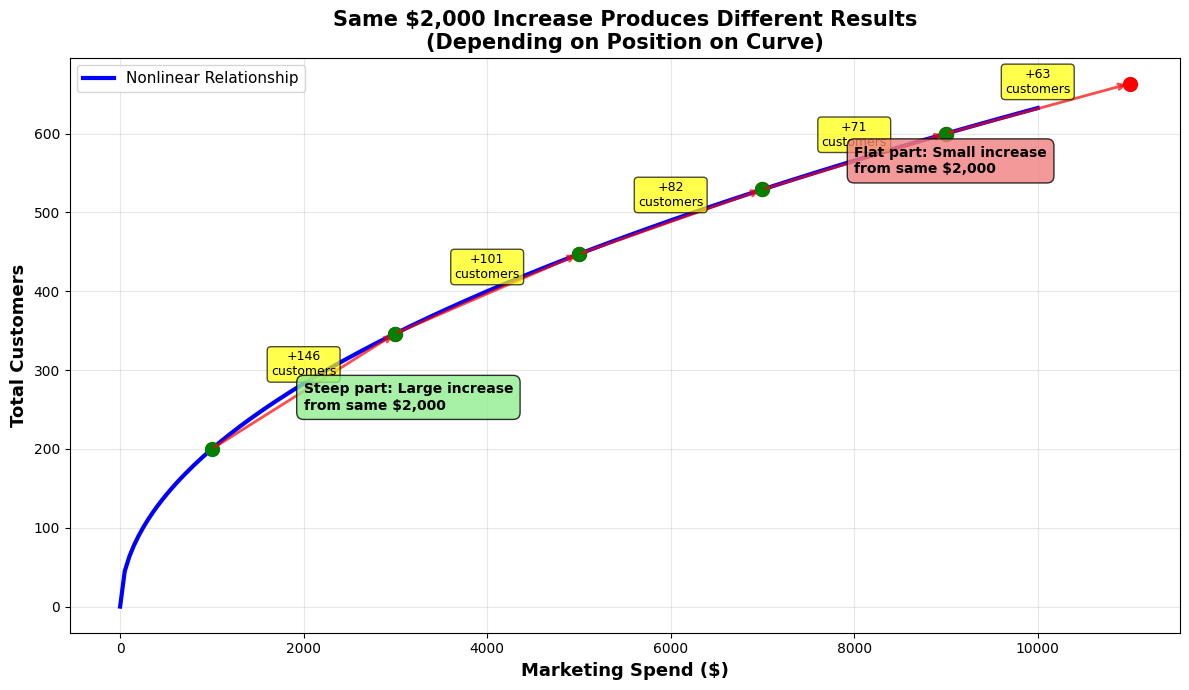


Visual Insight:
  - Green dots: Starting points
  - Red dots: After $2,000 increase
  - Red arrows: Show the increase in customers
  - Notice: Same $2,000 increase produces different customer increases
  - At low spending (steep part): Large increase
  - At high spending (flat part): Small increase


In [5]:
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the curve
spend_range = np.linspace(0, 10000, 200)
customers_range = [marketing_customers(s) for s in spend_range]
ax.plot(spend_range, customers_range, 'b-', linewidth=3, label='Nonlinear Relationship')

# Highlight different points with same $2,000 increase
increase = 2000
for base_spend in [1000, 3000, 5000, 7000, 9000]:
    base_customers = marketing_customers(base_spend)
    new_spend = base_spend + increase
    new_customers = marketing_customers(new_spend)
    
    # Plot base point
    ax.plot(base_spend, base_customers, 'go', markersize=10, zorder=3)
    # Plot new point
    ax.plot(new_spend, new_customers, 'ro', markersize=10, zorder=3)
    # Draw arrow showing increase
    ax.annotate('', xy=(new_spend, new_customers), xytext=(base_spend, base_customers),
               arrowprops=dict(arrowstyle='->', color='red', lw=2, alpha=0.7))
    # Label the increase
    increase_customers = new_customers - base_customers
    ax.text((base_spend + new_spend)/2, (base_customers + new_customers)/2 + 20,
           f'+{increase_customers:.0f}\ncustomers', fontsize=9, ha='center',
           bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

ax.set_xlabel('Marketing Spend ($)', fontsize=13, fontweight='bold')
ax.set_ylabel('Total Customers', fontsize=13, fontweight='bold')
ax.set_title('Same $2,000 Increase Produces Different Results\n(Depending on Position on Curve)', 
            fontsize=15, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)

# Add annotation
ax.annotate('Steep part: Large increase\nfrom same $2,000', 
            (2000, 250), fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.8))

ax.annotate('Flat part: Small increase\nfrom same $2,000', 
            (8000, 550), fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.8))

plt.tight_layout()
plt.show()

print("\nVisual Insight:")
print("  - Green dots: Starting points")
print("  - Red dots: After $2,000 increase")
print("  - Red arrows: Show the increase in customers")
print("  - Notice: Same $2,000 increase produces different customer increases")
print("  - At low spending (steep part): Large increase")
print("  - At high spending (flat part): Small increase")


## Step 6: Correct Interpretation - Understanding Position on Curve

To interpret correctly, you need to understand where you are on the curve:


In [6]:
# CORRECT INTERPRETATION: Understand where you are on the curve
# Calculate marginal returns at current and recommended levels

def marginal_return_at_level(spend, increment=100):
    """Calculate marginal return (customers per dollar) at a specific spending level"""
    current = marketing_customers(spend)
    next_level = marketing_customers(spend + increment)
    return (next_level - current) / increment

current_marginal = marginal_return_at_level(current_spend)
recommended_marginal = marginal_return_at_level(recommended_spend)

# Calculate what happens if we go beyond recommended
beyond_recommended = 7000
beyond_marginal = marginal_return_at_level(beyond_recommended)

interpretation_data = pd.DataFrame({
    'Spend Level': ['$3,000 (current)', '$5,000 (recommended)', '$7,000 (beyond)'],
    'Total Customers': [marketing_customers(3000), marketing_customers(5000), marketing_customers(7000)],
    'Marginal Return\n(customers per $)': [current_marginal, recommended_marginal, beyond_marginal],
    'Position on Curve': ['Steep (high returns)', 'Moderate (medium returns)', 'Flat (low returns)']
})

print("CORRECT INTERPRETATION: Understanding Position on Curve")
print("=" * 80)
display(interpretation_data.round(3))

print("\nKey Insights:")
print(f"  - At $3,000: Marginal return = {current_marginal:.3f} customers per dollar (HIGH)")
print(f"  - At $5,000: Marginal return = {recommended_marginal:.3f} customers per dollar (MODERATE)")
print(f"  - At $7,000: Marginal return = {beyond_marginal:.3f} customers per dollar (LOW)")
print("\n  → The recommendation makes sense: $5,000 is where returns are still good")
print("  → Beyond $5,000, marginal returns become too low to justify additional investment")
print("  → Understanding position on curve helps you interpret the recommendation correctly")


CORRECT INTERPRETATION: Understanding Position on Curve


,Spend Level,Total Customers,Marginal Return\n(customers per $),Position on Curve
0,"$3,000 (current)",346.410,0.057,Steep (high returns)
1,"$5,000 (recommended)",447.214,0.044,Moderate (medium returns)
2,"$7,000 (beyond)",529.150,0.038,Flat (low returns)



Key Insights:
  - At $3,000: Marginal return = 0.057 customers per dollar (HIGH)
  - At $5,000: Marginal return = 0.044 customers per dollar (MODERATE)
  - At $7,000: Marginal return = 0.038 customers per dollar (LOW)

  → The recommendation makes sense: $5,000 is where returns are still good
  → Beyond $5,000, marginal returns become too low to justify additional investment
  → Understanding position on curve helps you interpret the recommendation correctly


## Step 7: Safe Interpretation Strategy - Sensitivity Analysis

Use sensitivity analysis to understand how the recommendation changes with different assumptions:


In [7]:
# SENSITIVITY ANALYSIS: Test how recommendations change
# Vary the model parameters slightly to see robustness

# Original model: 200 * sqrt(spend/1000)
# Test variations: slightly different effectiveness

def marketing_customers_variant(marketing_spend, effectiveness_multiplier=1.0):
    """Variant of marketing model with different effectiveness"""
    return 200 * effectiveness_multiplier * np.sqrt(marketing_spend / 1000)

# Test different effectiveness levels
effectiveness_levels = [0.9, 1.0, 1.1]  # 90%, 100%, 110% of base effectiveness
sensitivity_results = []

for eff_mult in effectiveness_levels:
    current_cust = marketing_customers_variant(current_spend, eff_mult)
    # Find optimal spend (where marginal return is still reasonable)
    # For simplicity, test a few levels
    test_levels = [4000, 5000, 6000]
    best_level = None
    best_value = 0
    
    for test_spend in test_levels:
        test_cust = marketing_customers_variant(test_spend, eff_mult)
        # Simple value calculation (customers minus cost/100)
        value = test_cust - (test_spend / 100)
        if value > best_value:
            best_value = value
            best_level = test_spend
    
    sensitivity_results.append({
        'Effectiveness': f'{eff_mult*100:.0f}%',
        'Current Customers\n(at $3,000)': current_cust,
        'Recommended Spend': f'${best_level:,}',
        'Expected Customers': marketing_customers_variant(best_level, eff_mult)
    })

sensitivity_df = pd.DataFrame(sensitivity_results)
print("SENSITIVITY ANALYSIS: How Recommendations Change with Assumptions")
print("=" * 80)
display(sensitivity_df.round(0))

print("\nKey Insight:")
print("  - Recommendations are somewhat robust to small changes in assumptions")
print("  - But they do change, showing the importance of understanding the model")
print("  - Sensitivity analysis helps you understand the range of reasonable recommendations")


SENSITIVITY ANALYSIS: How Recommendations Change with Assumptions


,Effectiveness,"Current Customers\n(at $3,000)",Recommended Spend,Expected Customers
0,90%,312.0,"$6,000",441.0
1,100%,346.0,"$6,000",490.0
2,110%,381.0,"$6,000",539.0



Key Insight:
  - Recommendations are somewhat robust to small changes in assumptions
  - But they do change, showing the importance of understanding the model
  - Sensitivity analysis helps you understand the range of reasonable recommendations


## Summary: Safe Interpretation of Nonlinear Models

**Common Mistakes to Avoid**:
1. **Assuming linearity**: Don't use simple proportional rules
2. **Ignoring context**: Same change produces different results at different points
3. **Over-extrapolating**: Don't assume relationships continue the same way beyond data
4. **Missing inflection points**: Relationships can change at certain thresholds

**Safe Interpretation Strategies**:
1. **Understand position on curve**: Where are you? Steep or flat part?
2. **Consider marginal returns**: How effective is the next dollar?
3. **Use sensitivity analysis**: Test how recommendations change with assumptions
4. **Test with small changes**: Don't make large changes without testing
5. **Ask questions**: What assumptions is the model making? How do relationships work?

**Key Takeaway**: Nonlinear models require more careful interpretation than linear models. Understanding where you are on the curve and how relationships work helps you interpret recommendations correctly and avoid costly mistakes.
